### Fuzzy

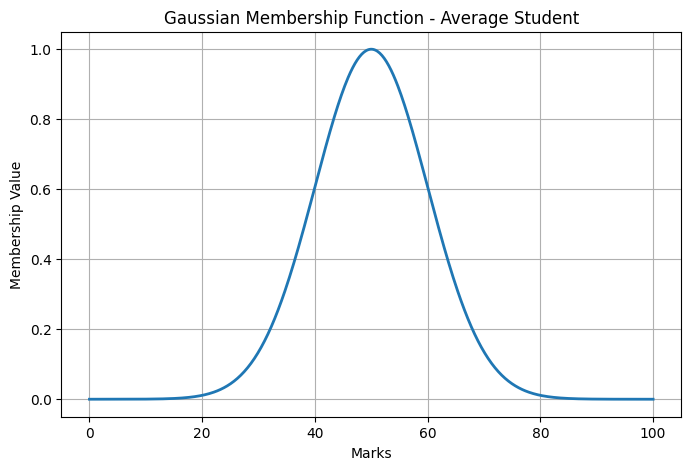

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian Membership Function
def gauss_mf(x, c, sigma):
    return np.exp(-0.5 * ((x - c) / sigma) ** 2)

# Parameters for "Average Student"
c = 50      
sigma = 10  

# Universe of discourse (0 to 100 marks)
x = np.linspace(0, 100, 500)

# Compute membership values
y = gauss_mf(x, c, sigma)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, y, linewidth=2)
plt.title("Gaussian Membership Function - Average Student")
plt.xlabel("Marks")
plt.ylabel("Membership Value")
plt.grid(True)
plt.show()


### Neural Network

In [10]:
import numpy as np

# --------------------------
# Activation functions
# --------------------------
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A

def sigmoid_backward(dA, Z):
    s = sigmoid(Z)
    return dA * s * (1 - s)

def relu(Z):
    return np.maximum(0, Z)

def relu_backward(dA, Z):
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

# --------------------------
# Initialize parameters
# --------------------------
def init_parameters(layer_dims, seed=42):
    np.random.seed(seed)
    params = {}
    L = len(layer_dims) - 1
    for l in range(1, L + 1):
        params[f"W{l}"] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1])
        params[f"b{l}"] = np.zeros((layer_dims[l], 1))
    return params

# --------------------------
# Forward propagation
# --------------------------
def forward_propagation(X, params, activations):
    caches = []
    A = X
    L = len(activations)
    for l in range(1, L + 1):
        W = params[f"W{l}"]
        b = params[f"b{l}"]
        Z = W @ A + b
        
        if activations[l-1] == 'relu':
            A_next = relu(Z)
        elif activations[l-1] == 'sigmoid':
            A_next = sigmoid(Z)
        elif activations[l-1] == 'softmax':
            A_next = softmax(Z)
        else:
            raise ValueError("Unsupported activation")

        caches.append((A, W, b, Z))
        A = A_next
    
    return A, caches

# --------------------------
# Loss (binary)
# --------------------------
def compute_loss_binary(AL, Y):
    m = Y.shape[1]
    eps = 1e-12
    loss = - (1/m) * np.sum(Y * np.log(AL + eps) + (1 - Y) * np.log(1 - AL + eps))
    return loss

# --------------------------
# Loss (categorical)
# --------------------------
def compute_loss_categorical(AL, Y):
    m = Y.shape[1]
    eps = 1e-12
    loss = - (1/m) * np.sum(Y * np.log(AL + eps))
    return loss

# --------------------------
# Backward propagation
# --------------------------
def backward_propagation(AL, Y, caches, activations):
    grads = {}
    m = Y.shape[1]
    L = len(activations)

    # dZ for last layer (softmax or sigmoid + CE)
    last_act = activations[-1]
    if last_act in ['sigmoid', 'softmax']:
        dZ = AL - Y
    else:
        raise ValueError("Last layer activation must be sigmoid or softmax")

    for l in reversed(range(1, L + 1)):
        A_prev, W, b, Z = caches[l-1]

        dW = (1/m) * (dZ @ A_prev.T)
        db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        
        grads[f"dW{l}"] = dW
        grads[f"db{l}"] = db

        if l > 1:
            dA_prev = W.T @ dZ
            Z_prev = caches[l-2][3]
            act_prev = activations[l-2]

            if act_prev == 'relu':
                dZ = relu_backward(dA_prev, Z_prev)
            elif act_prev == 'sigmoid':
                dZ = sigmoid_backward(dA_prev, Z_prev)
    
    return grads

# --------------------------
# Update parameters
# --------------------------
def update_parameters(params, grads, lr):
    L = len([k for k in params.keys() if k.startswith("W")])
    for l in range(1, L+1):
        params[f"W{l}"] -= lr * grads[f"dW{l}"]
        params[f"b{l}"] -= lr * grads[f"db{l}"]
    return params

# --------------------------
# Prediction
# --------------------------
def predict(X, params, activations):
    AL, _ = forward_propagation(X, params, activations)
    return (AL > 0.5).astype(int)

# --------------------------
# Training
# --------------------------
def train(X, Y, layer_dims, activations, epochs=1000, lr=0.1, print_every=100):
    params = init_parameters(layer_dims)
    for i in range(1, epochs+1):
        AL, caches = forward_propagation(X, params, activations)
        loss = compute_loss_binary(AL, Y)
        grads = backward_propagation(AL, Y, caches, activations)
        params = update_parameters(params, grads, lr)
        
        if i % print_every == 0:
            print(f"Epoch {i}/{epochs}, Loss = {loss:.6f}")
    
    return params

# --------------------------
# XOR Example
# --------------------------
if __name__ == "__main__":
    X = np.array([[0,0,1,1],[0,1,0,1]])
    Y = np.array([[0,1,1,0]])

    layer_dims = [2, 4, 1]
    activations = ['relu', 'sigmoid']

    params = train(X, Y, layer_dims, activations, epochs=5000, lr=0.5)

    preds = predict(X, params, activations)
    print("\nPredictions:", preds)
    print("True Labels:", Y)


Epoch 100/5000, Loss = 0.202840
Epoch 200/5000, Loss = 0.051940
Epoch 300/5000, Loss = 0.025522
Epoch 400/5000, Loss = 0.016250
Epoch 500/5000, Loss = 0.011713
Epoch 600/5000, Loss = 0.009130
Epoch 700/5000, Loss = 0.007435
Epoch 800/5000, Loss = 0.006243
Epoch 900/5000, Loss = 0.005378
Epoch 1000/5000, Loss = 0.004706
Epoch 1100/5000, Loss = 0.004179
Epoch 1200/5000, Loss = 0.003756
Epoch 1300/5000, Loss = 0.003407
Epoch 1400/5000, Loss = 0.003116
Epoch 1500/5000, Loss = 0.002865
Epoch 1600/5000, Loss = 0.002656
Epoch 1700/5000, Loss = 0.002473
Epoch 1800/5000, Loss = 0.002311
Epoch 1900/5000, Loss = 0.002170
Epoch 2000/5000, Loss = 0.002045
Epoch 2100/5000, Loss = 0.001932
Epoch 2200/5000, Loss = 0.001829
Epoch 2300/5000, Loss = 0.001738
Epoch 2400/5000, Loss = 0.001656
Epoch 2500/5000, Loss = 0.001580
Epoch 2600/5000, Loss = 0.001510
Epoch 2700/5000, Loss = 0.001446
Epoch 2800/5000, Loss = 0.001388
Epoch 2900/5000, Loss = 0.001334
Epoch 3000/5000, Loss = 0.001283
Epoch 3100/5000, Lo

### Genetic Algorithm

In [15]:
import random, math

def fitness(x): return math.sqrt(x)

def GA(pop=10, gen=20):
    population=[random.randint(1,16) for _ in range(pop)]
    for _ in range(gen):
        fit=[fitness(x) for x in population]
        probs=[f/sum(fit) for f in fit]

        def pick():
            r,c= random.random(),0
            for x,p in zip(population,probs):
                c+=p
                if r<=c: return x

        new=[]
        for _ in range(pop):
            child=(pick()+pick())//2
            if random.random()<0.1: child=random.randint(1,16)
            new.append(max(1,min(child,16)))
        population=new

    best=max(population,key=fitness)
    return best, fitness(best)

x,y=GA()
print("Best x found:",x)
print("Maximized y = sqrt(x):",y)

Best x found: 15
Maximized y = sqrt(x): 3.872983346207417


### Hybrid System

In [21]:
import numpy as np

# --------------------------
# Gaussian membership function
# --------------------------
def gaussian_mf(x, mean, sigma):
    return np.exp(-0.5 * ((x - mean) / sigma) ** 2)

# --------------------------
# Fuzzy wash-time system
# --------------------------
def fuzzy_wash_time(dirt, load):

    # Fuzzy sets for dirtiness
    dirt_low  = gaussian_mf(dirt, 2, 1.5)
    dirt_med  = gaussian_mf(dirt, 5, 1.5)
    dirt_high = gaussian_mf(dirt, 8, 1.5)

    # Fuzzy sets for load
    load_small = gaussian_mf(load, 2, 1.5)
    load_med   = gaussian_mf(load, 5, 1.5)
    load_large = gaussian_mf(load, 8, 1.5)

    # Rules
    rule_short  = min(dirt_low,  load_small)     # 20 min
    rule_medium = min(dirt_med,  load_med)       # 35 min
    rule_long   = max(dirt_high, load_large)     # 50 min

    denom = rule_short + rule_medium + rule_long
    if denom == 0:  
        return 20  # fallback safe time

    wash_time = (rule_short*20 + rule_medium*35 + rule_long*50) / denom
    return wash_time

# --------------------------
# Dataset generation
# --------------------------
X = []
Y = []

for d in range(0, 11):
    for l in range(0, 11):
        X.append([d, l])
        Y.append(fuzzy_wash_time(d, l))

X = np.array(X)
Y = np.array(Y)

# --------------------------
# Simple Neural Network
# --------------------------
class SimpleNN:
    def __init__(self):   # Fixed constructor
        self.W1 = np.random.randn(2, 4) * 0.1
        self.b1 = np.zeros((1, 4))
        self.W2 = np.random.randn(4, 1) * 0.1
        self.b2 = np.zeros((1, 1))

    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_deriv(self, x):
        return (x > 0).astype(float)

    def forward(self, X):
        self.z1 = X.dot(self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = self.a1.dot(self.W2) + self.b2
        return self.z2

    def train(self, X, Y, lr=0.001, epochs=2000):
        Y = Y.reshape(-1, 1)

        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Loss (MSE)
            loss = np.mean((output - Y)**2)

            # Backpropagation
            dz2 = 2 * (output - Y) / len(Y)
            dW2 = self.a1.T.dot(dz2)
            db2 = np.sum(dz2, axis=0, keepdims=True)

            da1 = dz2.dot(self.W2.T)
            dz1 = da1 * self.relu_deriv(self.z1)
            dW1 = X.T.dot(dz1)
            db1 = np.sum(dz1, axis=0, keepdims=True)

            # Update weights
            self.W2 -= lr * dW2
            self.b2 -= lr * db2
            self.W1 -= lr * dW1
            self.b1 -= lr * db1

            if epoch % 200 == 0:
                print(f"Epoch {epoch}, Loss = {loss:.4f}")

# --------------------------
# Train model
# --------------------------
nn = SimpleNN()
nn.train(X,Y, lr=0.001, epochs=2000)

# --------------------------
# Test prediction
# --------------------------
test_input = np.array([[7, 8]])
predicted_time = nn.forward(test_input)[0][0]
print(f"Predicted wash time for dirt={test_input[0][0]}, load={test_input[0][1]}: {predicted_time:.2f} min")


Epoch 0, Loss = 1851.3864
Epoch 200, Loss = 67.3546
Epoch 400, Loss = 44.6326
Epoch 600, Loss = 44.1925
Epoch 800, Loss = 44.0368
Epoch 1000, Loss = 44.0655
Epoch 1200, Loss = 44.0362
Epoch 1400, Loss = 44.2582
Epoch 1600, Loss = 44.2391
Epoch 1800, Loss = 44.0556
Predicted wash time for dirt=7, load=8: 50.80 min
